<a href="https://colab.research.google.com/github/SzuHannah/blending-stochastic/blob/main/stochastic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gurobipy

     |████████████████████████████████| 11.5 MB 6.3 MB/s 


In [ ]:
import numpy as np
import gurobipy as grb
import scipy.stats as stat
from tqdm.notebook import trange
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### one quality measure, two raw materials, and one product

In [ ]:
N_seq = [10, 20, 50, 100, 200, 500, 1000]; # number of samples
# N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        LB_model.update()

        # Define Objective
        for k in range(N):
          LB_model.setPWLObj(x[1,k],[-10.2,-1*eps,eps,5.75],[0,0,eps,5.75])
          LB_model.setPWLObj(x[2,k],[-10.2,-1*eps,eps,5.75],[0,0,eps,5.75])
        # Constraints
        for k in range(N):
          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 150, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k] + x[2,k] >= 0.3, name = "constr2(%s)"%k)
        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2023-10-25
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  2.9999999999999996
Lower Bound Variance =  2.1912802922805884e-31
CI of Lower Bound = [ 2.9999999999999996  ,  2.9999999999999996 ]
######################## Sample size ( 20 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  5.999999999999998
Lower Bound Variance =  8.765121169122354e-31
CI of Lower Bound = [ 5.999999999999998  ,  5.999999999999998 ]
######################## Sample size ( 50 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  14.999999999999972
Lower Bound Variance =  0.0
CI of Lower Bound = [ 14.999999999999972  ,  14.999999999999972 ]
######################## Sample size ( 100 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  30.000000000000007
Lower Bound Variance =  1.4024193870595766e-29
CI of Lower Bound = [ 30.000000000000007  ,  30.000000000000007 ]
######################## Sample size ( 200 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  59.99999999999976
Lower Bound Variance =  2.2438710192953226e-28
CI of Lower Bound = [ 59.99999999999975  ,  59.999999999999766 ]
######################## Sample size ( 500 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  150.00000000000088
Lower Bound Variance =  0.0
CI of Lower Bound = [ 150.00000000000088  ,  150.00000000000088 ]
######################## Sample size ( 1000 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
{1: 0.29, 2: 0.01}
Lower Bound =  299.9999999999965
Lower Bound Variance =  3.590193630872516e-27
CI of Lower Bound = [ 299.9999999999965  ,  299.9999999999965 ]


### cVAR obj

In [ ]:
N_seq = [10, 50, 100, 300]; # number of samples
#N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          LB_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75+eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)


          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 130)
          LB_model.addConstr(x[1,k] + x[2,k] >= 0.3)

        LB_model.setObjective((1/eps)*u, grb.GRB.MAXIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.00010180756094184484}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0013405429282964505}
{1: 0.34, 2: 0.0003397362279111185}
{1: 0.34, 2: 0.0018958364381866932}
{1: 0.34, 2: 0.0007851240665181608}
{1: 0.34, 2: 0.0018797351235230186}
{1: 0.34, 2: 0.0009835445708056031}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
Lower Bound =  910.1356283046762
Lower Bound Variance =  431.6522322608226
CI of Lower Bound = [ 903.3008528981571  ,  916.9704037111952 ]
######################## Sample size ( 50 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0012823095343596593}
{1: 0.34, 2: 0.0009225109532757912}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0017177194657000516}
{1: 0.34, 2: 0.0015245890395309024}
{1: 0.34, 2: 0.0020592743588081497}
{1: 0.34, 2: 0.00238679785604452}
{1: 0.34, 2: 0.0}
Lower Bound =  908.5737617072584
Lower Bound Variance =  515.7942126218206
CI of Lower Bound = [ 901.1024735837304  ,  916.0450498307864 ]
######################## Sample size ( 100 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.0018620652857705262}
{1: 0.34, 2: 0.00043581997640711656}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0003081099658221729}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
Lower Bound =  896.9727736426452
Lower Bound Variance =  400.9078951185141
CI of Lower Bound = [ 890.385896594049  ,  903.5596506912414 ]
######################## Sample size ( 300 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.001682911896089682}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.002321736158284682}
{1: 0.34, 2: 0.0023347598973495476}
{1: 0.34, 2: 0.0004260706794238506}
Lower Bound =  906.8417962024935
Lower Bound Variance =  516.3722666187981
CI of Lower Bound = [ 899.366322690195  ,  914.3172697147919 ]


### 1 product, 7 raw materials, 1 quality measure

In [ ]:
N_seq = [10, 20, 50, 100, 200]; # number of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective
        for i in range(1,8):
          for k in range(N):
            LB_model.setPWLObj(x[i,k],[-25.94,-1*eps,eps,5.75],[0,0,eps,5.75])
        # Constraints
        for k in range(N):
          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] + 47.89 * (x[3,k] + x[4,k] + x[5,k]) + 54.22 * x[6,k] + 48.99 * x[7,k]<= 130, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]+x[3,k]+x[4,k]+x[5,k]+x[6,k]+x[7,k]>= 0.3, name = "constr2(%s)"%k)
        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
Lower Bound =  2.999999999999994
Lower Bound Variance =  2.1912802922805884e-31
CI of Lower Bound = [ 2.999999999999994  ,  2.999999999999994 ]
######################## Sample size ( 20 ) ######################

  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
Lower Bound =  5.999999999999983
Lower Bound Variance =  8.765121169122354e-31
CI of Lower Bound = [ 5.999999999999983  ,  5.999999999999983 ]
######################## Sample size ( 50 ) #######################

  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
Lower Bound =  14.999999999999947
Lower Bound Variance =  1.4024193870595766e-29
CI of Lower Bound = [ 14.999999999999945  ,  14.999999999999948 ]
######################## Sample size ( 100 ) ##################

  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
Lower Bound =  30.00000000000032
Lower Bound Variance =  1.4024193870595766e-29
CI of Lower Bound = [ 30.00000000000032  ,  30.00000000000032 ]
######################## Sample size ( 200 ) #####################

  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
{1: 0.23999999999999994, 2: 0.01, 3: 0.01, 4: 0.01, 5: 0.01, 6: 0.01, 7: 0.01}
Lower Bound =  59.99999999999942
Lower Bound Variance =  5.609677548238306e-29
CI of Lower Bound = [ 59.99999999999942  ,  59.99999999999942 ]


### 1 product 3 raw materials 2 quality measure

In [ ]:
N_seq = [10, 20, 50, 100, 200]; # number of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective
        for i in range(1,8):
          for k in range(N):
            LB_model.setPWLObj(x[i,k],[-25.94,-1*eps,eps,5.75],[0,0,eps,5.75])
        # Constraints
        for k in range(N):
          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] + 47.89 * (x[3,k] + x[4,k] + x[5,k]) + 54.22 * x[6,k] + 48.99 * x[7,k]<= 130, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]+x[3,k]+x[4,k]+x[5,k]+x[6,k]+x[7,k]>= 0.3, name = "constr2(%s)"%k)
        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


### smooth function test

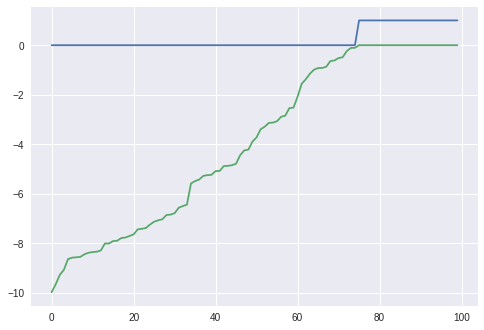

In [ ]:
#smoothed function
def smoothf(z,eps):
  val = 0
  if z < eps:
    val = z
  elif z >= -1*eps and z <= eps:
    val = (1/(4*eps))*(z**2 + 2*z*eps+eps**2)
  else:
    val = 0
  return val
def indicatorf(z):
  val = 0
  if z>0:
    val = 1
  else:
    val = 0
  return val
def main():
  N = 100
  p1 = np.random.uniform(-1,5,size=N)
  x1 = np.linspace(-2, 2, 100000)
  for k in range(100):
    indicatorfs = [indicatorf(p1[k]*x1[k]) for k in range(100)]
    smoothfs = [smoothf(p1[k]*x1[k],0.0001) for k in range(100)]
  indicatorfs.sort()
  smoothfs.sort()
  plt.plot(indicatorfs)
  plt.plot(smoothfs)
if __name__ == "__main__":
  main()

In [ ]:
N_seq = [10, 50, 100]; # number of samples
#N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.0001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          LB_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75+eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] + 47.89 * (x[3,k] + x[4,k] + x[5,k]) + 54.22 * x[6,k] + 48.99 * x[7,k]<= 130, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]+x[3,k]+x[4,k]+x[5,k]+x[6,k]+x[7,k]>= 0.3)

        LB_model.setObjective((1/eps)*u, grb.GRB.MAXIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
Lower Bound =  259634.42835658384
Lower Bound Variance =  17159988.190431163
CI of Lower Bound = [ 258271.67975583643  ,  260997.17695733125 ]
######################## Sample size ( 50 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
Lower Bound =  259328.85243393885
Lower Bound Variance =  49422625.537463
CI of Lower Bound = [ 257016.14786130455  ,  261641.55700657316 ]
######################## Sample size ( 100 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
{1: 0.34, 2: 0.6, 3: 0.11, 4: 0.27, 5: 0.25, 6: 0.34, 7: 0.0}
Lower Bound =  260930.93722354536
Lower Bound Variance =  15043302.738949634
CI of Lower Bound = [ 259655.0013434426  ,  262206.87310364813 ]


### ash content, thermal content
easily exceed free-licence limit if use cvaR obj.

In [ ]:
N_seq = [10, 20, 30]; # number of samples
#N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1t = np.random.uniform(16.768,16.982,N)
        e2t = np.random.uniform(14.540,15.656, N)
        e1a = np.random.uniform(0.30,0.75,N)
        e2a = np.random.uniform(0.1,1.13,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))


        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          a = LB_model.addVar()
          LB_model.addConstr(t == e1t[k]*x[1,k]+e2t[k]*x[2,k]-5.75+eps)
          LB_model.addConstr(a== (1-e1a[k])*x[1,k]+(1-e2a[k])*x[2,k] + eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          v = LB_model.addVar()
          LB_model.addGenConstrMax(v,[a],0)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k]<= 130, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]>= 0.3)

        LB_model.setObjective((1/eps)*u*v, grb.GRB.MAXIMIZE)
        LB_model.setParam('NonConvex', 2)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.00021367230475507}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.001332472444496873}
{1: 0.34, 2: 0.0017047272540030537}
{1: 0.34, 2: 0.0006994000533150523}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0025624798759830915}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.002556164358362738}
Lower Bound =  277.7935148673561
Lower Bound Variance =  43665.64430713549
CI of Lower Bound = [ 209.0507194269526  ,  346.53631030775966 ]
######################## Sample size ( 20 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0013107868121453301}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.001883335719518433}
{1: 0.34, 2: 0.000648725608811154}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
Lower Bound =  402.1681623708265
Lower Bound Variance =  26447.880705915064
CI of Lower Bound = [ 348.66829675657107  ,  455.66802798508195 ]
######################## Sample size ( 30 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.002120332688360807}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.0019319196077894896}
{1: 0.34, 2: 0.0}
{1: 0.34, 2: 0.002149128874437261}
Lower Bound =  423.76648352390214
Lower Bound Variance =  36787.43792781758
CI of Lower Bound = [ 360.669728653767  ,  486.8632383940373 ]


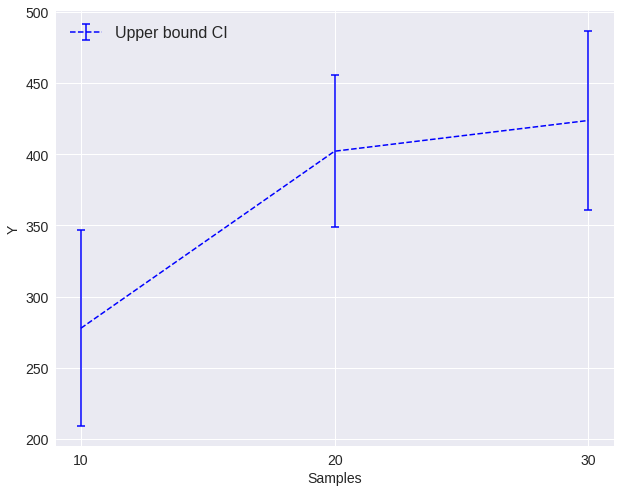

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['Upper bound CI','Lower bound CI'], fontsize  = 16)
plt.show()